# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of numbers and then save it to a text file named "simple_data.txt"

In [6]:
with open("./data/simple_data.txt", "w") as f:
    f.write("\n".join([str(i) for i in np.random.random(size=(100,))]))


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [5]:
with open("./data/data.txt", "w") as f:
    f.write("\n".join([" ".join([str(i) for i in j]) for j in np.random.random(size=(5,5))]))


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [7]:
with open("./data/data.txt", "r") as f:
    with open("./data/data.csv", "w") as f2:
        for l in f.read():
            f2.write(",".join(l.split(" ")))
            


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [98]:
with open("./credit_card.dat","rb") as f:
    for l in f.readlines():
        #print(l)
        
        i=int(l,2)>>4
        a=[]
        while(i>0):
            #print(i&0b111111)
            a.append(chr(i&0b111111))
            i=i>>6
        print("".join(reversed(a)))
        
        l=l.strip()
        if(l==b''):
            continue
        a=[]
        for i in range(0, 114, 6):
            if(l[i:i+6]==b''):
                continue
            a.append(l[i:i+6])
        s=[chr(int(i, base=2)) for i in a]
        print("".join(s)) 
        print("\n")

7648 5673 3775 2271
7648 5673 3775 2271


3257 8247 3354 2266
3257 8247 3354 2266


2722 0001 4011 6652
2722 0001 4011 6652


0661 3063 3742 3150
0661 3063 3742 3150


0432 1608 1462 4742
0432 1608 1462 4742


5827 2027 8785 7303
5827 2027 8785 7303


5774 8528 2087 1117
5774 8528 2087 1117


8140 1210 6352 2845
8140 1210 6352 2845


5764 1133 7301 7100
5764 1133 7301 7100


6456 1737 4126 6726
6456 1737 4126 6726


1228 8631 7382 0000
1228 8631 7382 0000


7051 0160 5374 3166
7051 0160 5374 3166


0618 3587 1630 6376
0618 3587 1630 6376


1545 5454 7444 5636
1545 5454 7444 5636


6735 3116 3202 6834
6735 3116 3202 6834


7287 5011 1547 8413
7287 5011 1547 8413


7033 2607 3328 4200
7033 2607 3328 4200


2568 5244 1874 5024
2568 5244 1874 5024


1684 2253 7570 7118
1684 2253 7570 7118


0672 2576 0575 6631
0672 2576 0575 6631


6332 8353 8787 1340
6332 8353 8787 1340


1813 3361 1175 4211
1813 3361 1175 4211


2477 6450 8840 2368
2477 6450 8840 2368


5512 3505 2563 1326
5512 3505 2563

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [15]:
import json
data=json.load(open("./user_data.json"))
tosave=[]
for i in data:
    if i["CreditCardType"]=="American Express":
        tosave.append(i)

ks=""
for k in tosave[0].keys():
    ks+=k+","
ks=ks[:-1]

vs=[]
for i in tosave:
    vs.append("")
    for k in ks.split(","):
        vs[-1]+=i[k]+","
    vs[-1]=vs[-1][:-1]
    
#print(ks+"\n"+"\n".join(vs))
with open("am_exp_user_data.csv", "w") as f:
    f.write(ks+"\n"+"\n".join(vs))

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe what you see


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


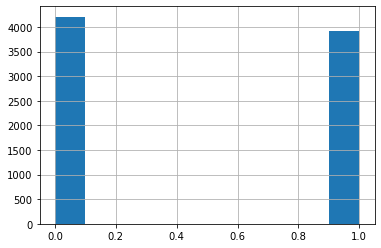

In [14]:
import urllib.request
with urllib.request.urlopen("https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1") as f:
    df=pd.read_csv(f)
    print(df.columns)
    df["class"].hist()

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

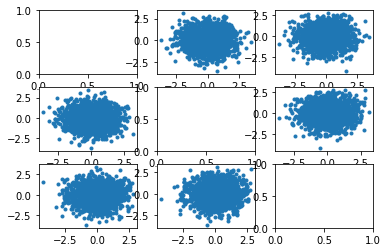

In [54]:
import matplotlib.pyplot as plt
with urllib.request.urlopen("https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1") as f:
    df=pd.read_csv(f)
    #print(df)
    fig, ax=plt.subplots(3,3)
    ax[0][1].scatter(df["features_1"], df["features_2"], marker=".")
    ax[0][2].scatter(df["features_1"], df["features_3"], marker=".")
    ax[1][2].scatter(df["features_2"], df["features_3"], marker=".")
    ax[1][0].scatter(df["features_2"], df["features_1"], marker=".")
    ax[2][0].scatter(df["features_3"], df["features_1"], marker=".")
    ax[2][1].scatter(df["features_3"], df["features_2"], marker=".")

8\. Load the same file of point 6, and convert the file to json with Pandas.